In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn import metrics
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy  as sch
#from keras.layers import Dense

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("E:\\Churn prediction\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# EDA

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# validation the datatypes

In [8]:
# Check for null values

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# There are no null values in given dataset

# Check for duplicate values

In [11]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [12]:
# There is no duplicate records in gvn dataset

In [13]:
# Distribution of datset

In [14]:
# An

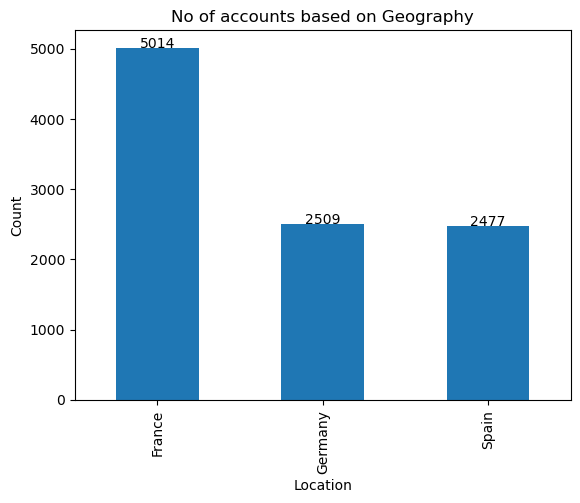

In [15]:
df['Geography'].value_counts().plot(kind='bar')
plt.title('No of accounts based on Geography')
plt.xlabel('Location')
plt.ylabel('Count')

for i,j in enumerate(df['Geography'].value_counts()):
    plt.text(i,j,str(j),ha='center')

In [16]:
# Most of the account holders are from the Country-France
# Account holders from location Germany and Spain are 1:1

In [17]:
# Distribution of plot

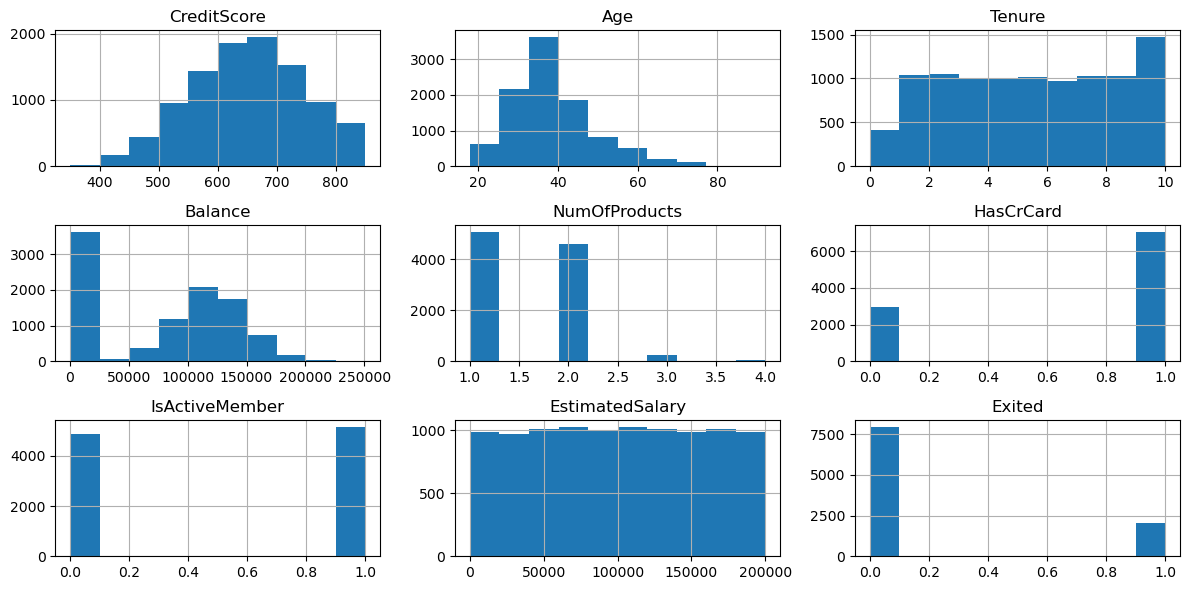

In [18]:
df.hist(figsize=(12,6));
plt.tight_layout()

In [19]:
cont_features=df.select_dtypes(exclude=['object']).columns
cont_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
import warnings
warnings.filterwarnings('ignore')

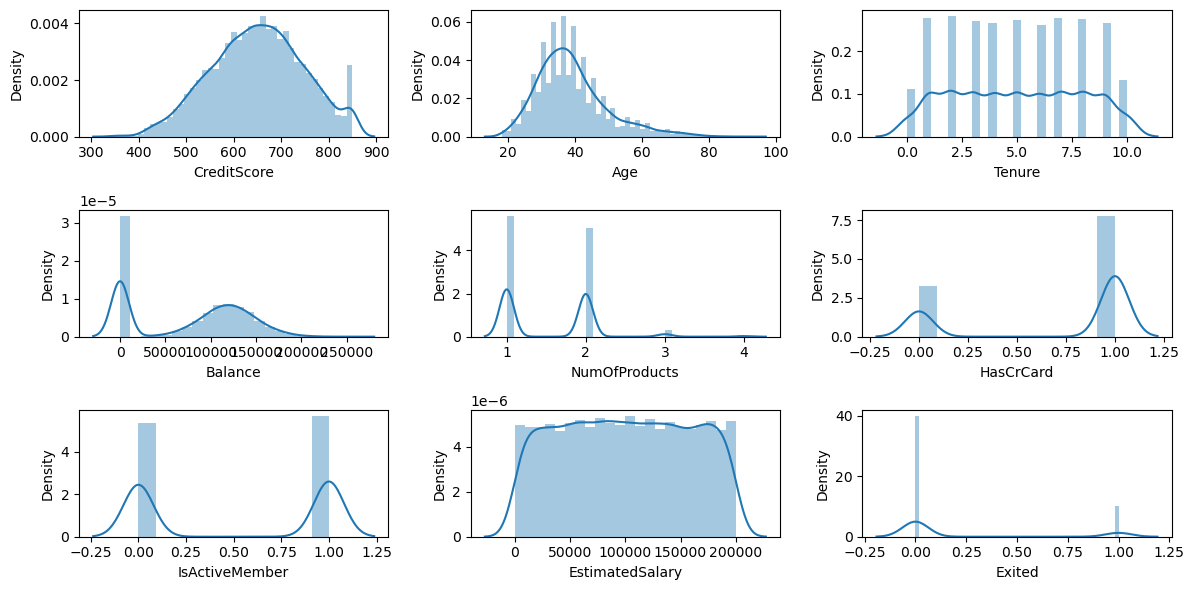

In [21]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(cont_features):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.distplot(df[j])
    count+=1
plt.tight_layout()
plt.show()

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- These statistics can provide some insights into the distribution of credit scores in the dataset.we can see that the majority of credit scores fall between 584 and 718, with a median credit score of 652. However, there are some credit scores that are much lower or higher than this range, with the minimum score of 350 and maximum score of 850. These outliers may be worth further investigation to understand if they are legitimate data points or if they are errors or anomalies that need to be addressed

- For Age column we can see that average age of customers are around 39,however the majority of customers age fall between the 18 and 44 with median of 37 and also maximum can be seen is 92 and min age is 18


- average salary of customers is 100090 approx,however the majority of salary lies between 51002 and 149388 with median of 97198.540 

- custumers are maintaining average balance of 76485,as we can see that 36% of customers are maintaining the balamce 0 and the remaining customers are maintaing the  average balance of 125449.045

In [23]:
(np.percentile(df['Balance'],100)-np.percentile(df['Balance'],36))/2

125449.045

# Outliers detection

In [24]:
# Finding the outliers using z-score
# Calculate the Z-score for each data point
z_scores = np.abs((df - df.mean()) / df.std())

# Identify outliers with Z-scores greater than 3 or less than -3
outliers = z_scores > 3

# Print the number of outliers found for each column
print(outliers.sum())

Age                133
Balance              0
CreditScore          8
EstimatedSalary      0
Exited               0
Gender               0
Geography            0
HasCrCard            0
IsActiveMember       0
NumOfProducts       60
Tenure               0
dtype: int64


In [25]:
outlier_indices = np.where(outliers)
outlier_df = df.iloc[outlier_indices[0]]
outlier_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,673,France,Male,72,1,0.00,2,0,1,111981.19,0
...,...,...,...,...,...,...,...,...,...,...,...
9646,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9671,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


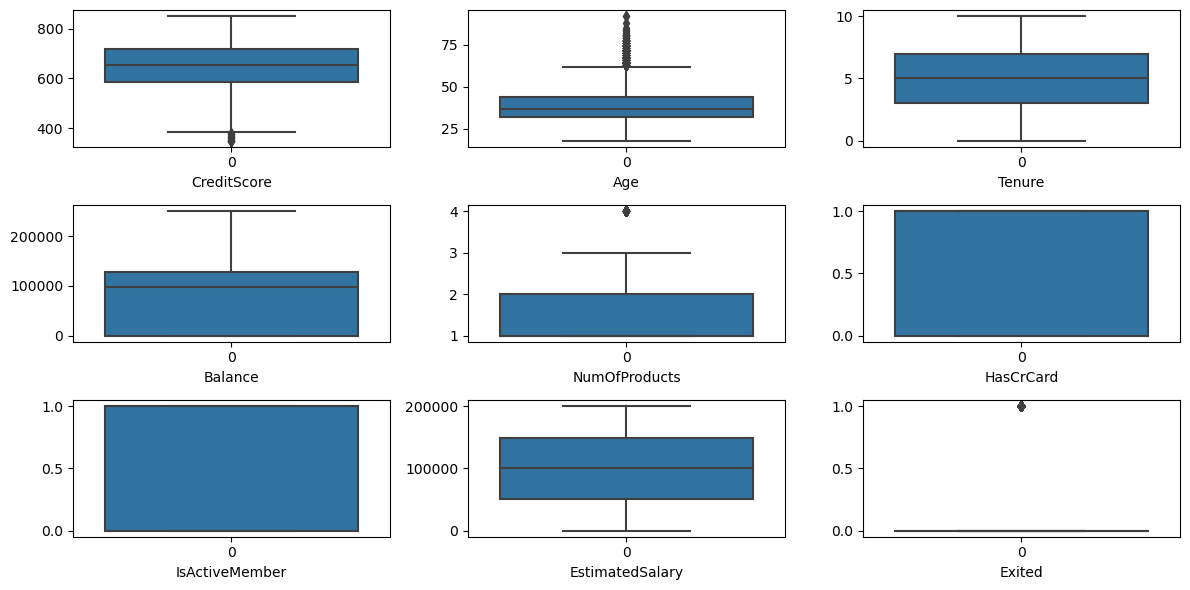

In [26]:
fig = plt.figure(figsize=(12, 6))
count = 1
for i, j in enumerate(cont_features):
    plt.subplots_adjust(left=0.75, bottom=0.75, right=2, top=2, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(3, 3, count)
    sns.boxplot(df[j], ax=ax)
    ax.set_xlabel(j)  # set the x-axis label to the column name
    count += 1
plt.tight_layout()
plt.show()

In [27]:
# There are outliers in Creditscore,Age,Exited
# Will store the outliers in variable,in order to remove the outliers we need a domain knowlegde

In [28]:
# Check for imbalance data

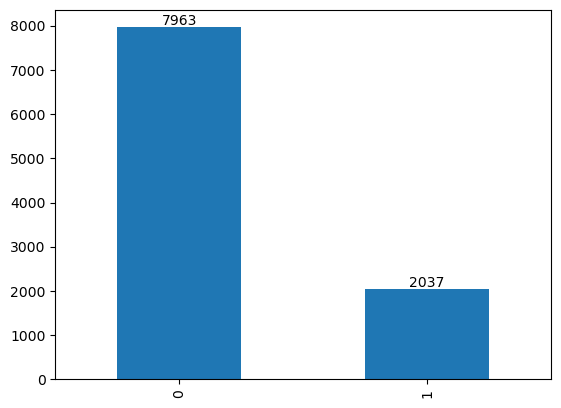

In [29]:
df['Exited'].value_counts().plot(kind='bar')
for i,j in enumerate(df['Exited'].value_counts()):
    plt.text(i,j,str(j),ha='center',va='bottom')

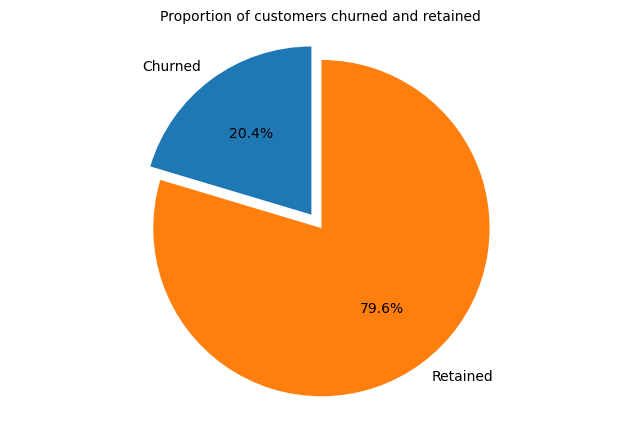

In [30]:
churn_count=df[df['Exited']==1]['Exited'].count()
retain_count=df[df['Exited']==0]['Exited'].count()

labels=['Churned','Retained']
sizes=[churn_count,retain_count]

fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(sizes,labels=labels,autopct='%1.1f%%',explode=[0.1,0],startangle=90)
plt.title('Proportion of customers churned and retained', size=10)
ax.axis('equal');

In [31]:
# most of customers from class 0 are still maintaining the bank account
# but class 1 2037 has closed the bank account

Text(1066.1767676767674, 0.5, 'Has Credit Card')

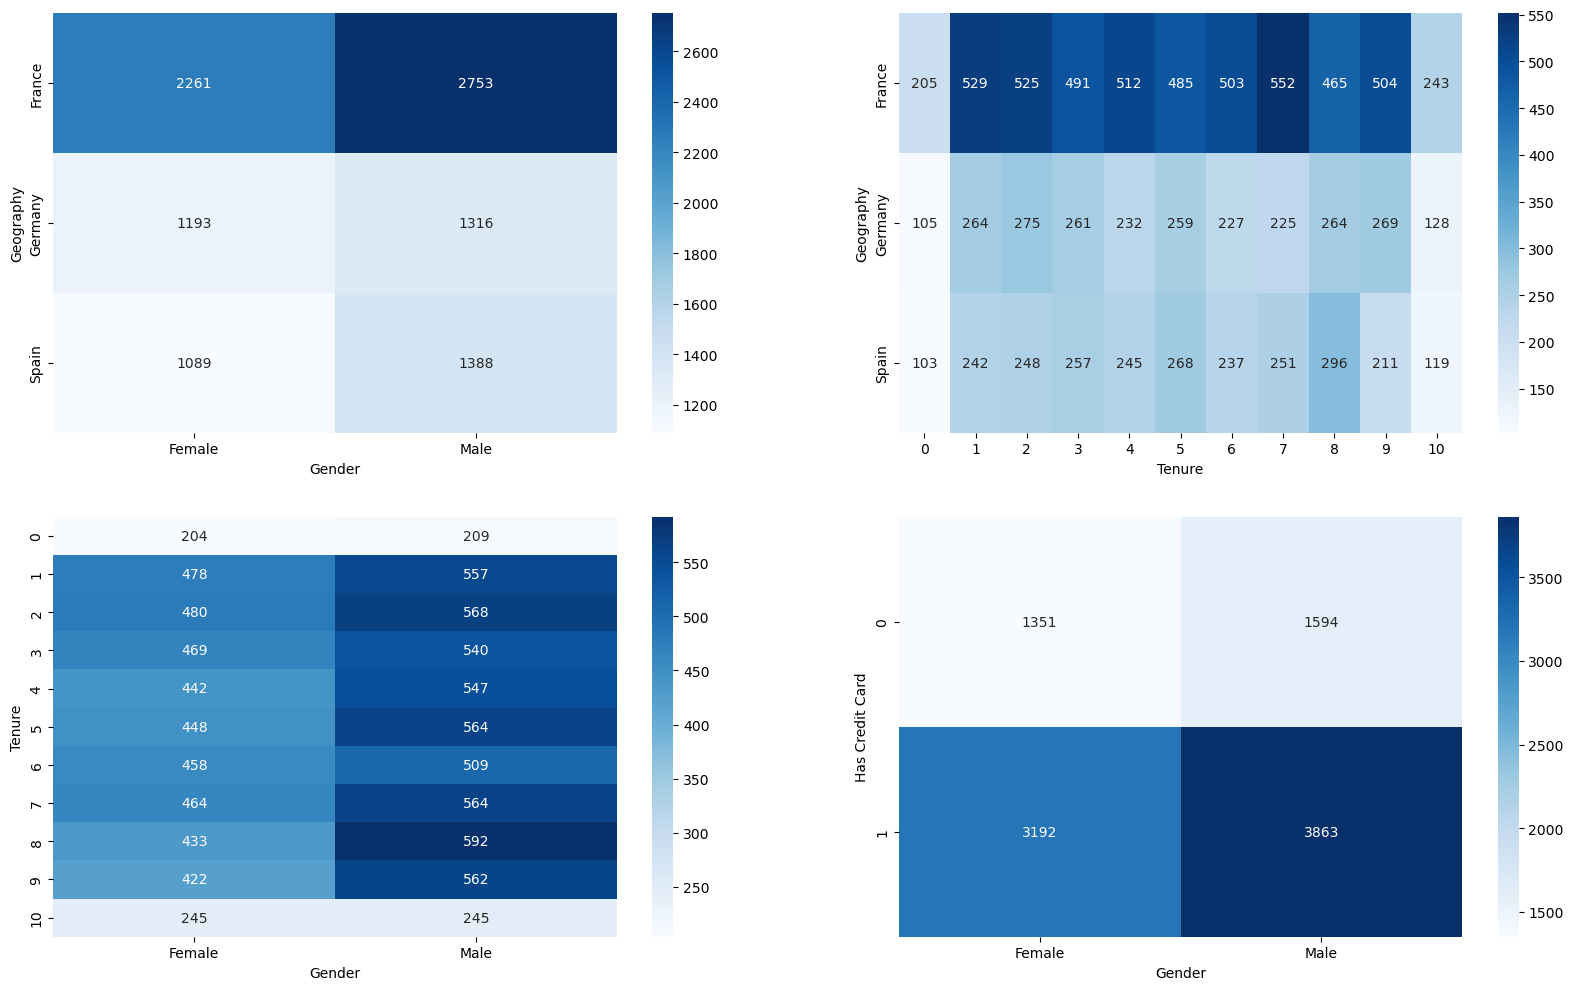

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'
ct = pd.crosstab(df['Geography'], df['Gender'])
sns.heatmap(ct, cmap='Blues', annot=True, fmt='d', ax=ax[0][0])
ax[0][0].set_xlabel('Gender')
ax[0][0].set_ylabel('Geography')

ct1 = pd.crosstab(df['Geography'], df['Tenure'])
sns.heatmap(ct1, cmap='Blues', annot=True, fmt='d', ax=ax[0][1])
ax[0][1].set_xlabel('Tenure')
ax[0][1].set_ylabel('Geography')

ct2 = pd.crosstab(df['Tenure'], df['Gender'])
sns.heatmap(ct2, cmap='Blues', annot=True, fmt='d', ax=ax[1][0])
ax[1][0].set_xlabel('Gender')
ax[1][0].set_ylabel('Tenure')

ct3 = pd.crosstab(df['HasCrCard'], df['Gender'])
sns.heatmap(ct3, cmap='Blues', annot=True, fmt='d', ax=ax[1][1])
ax[1][1].set_xlabel('Gender')
ax[1][1].set_ylabel('Has Credit Card')


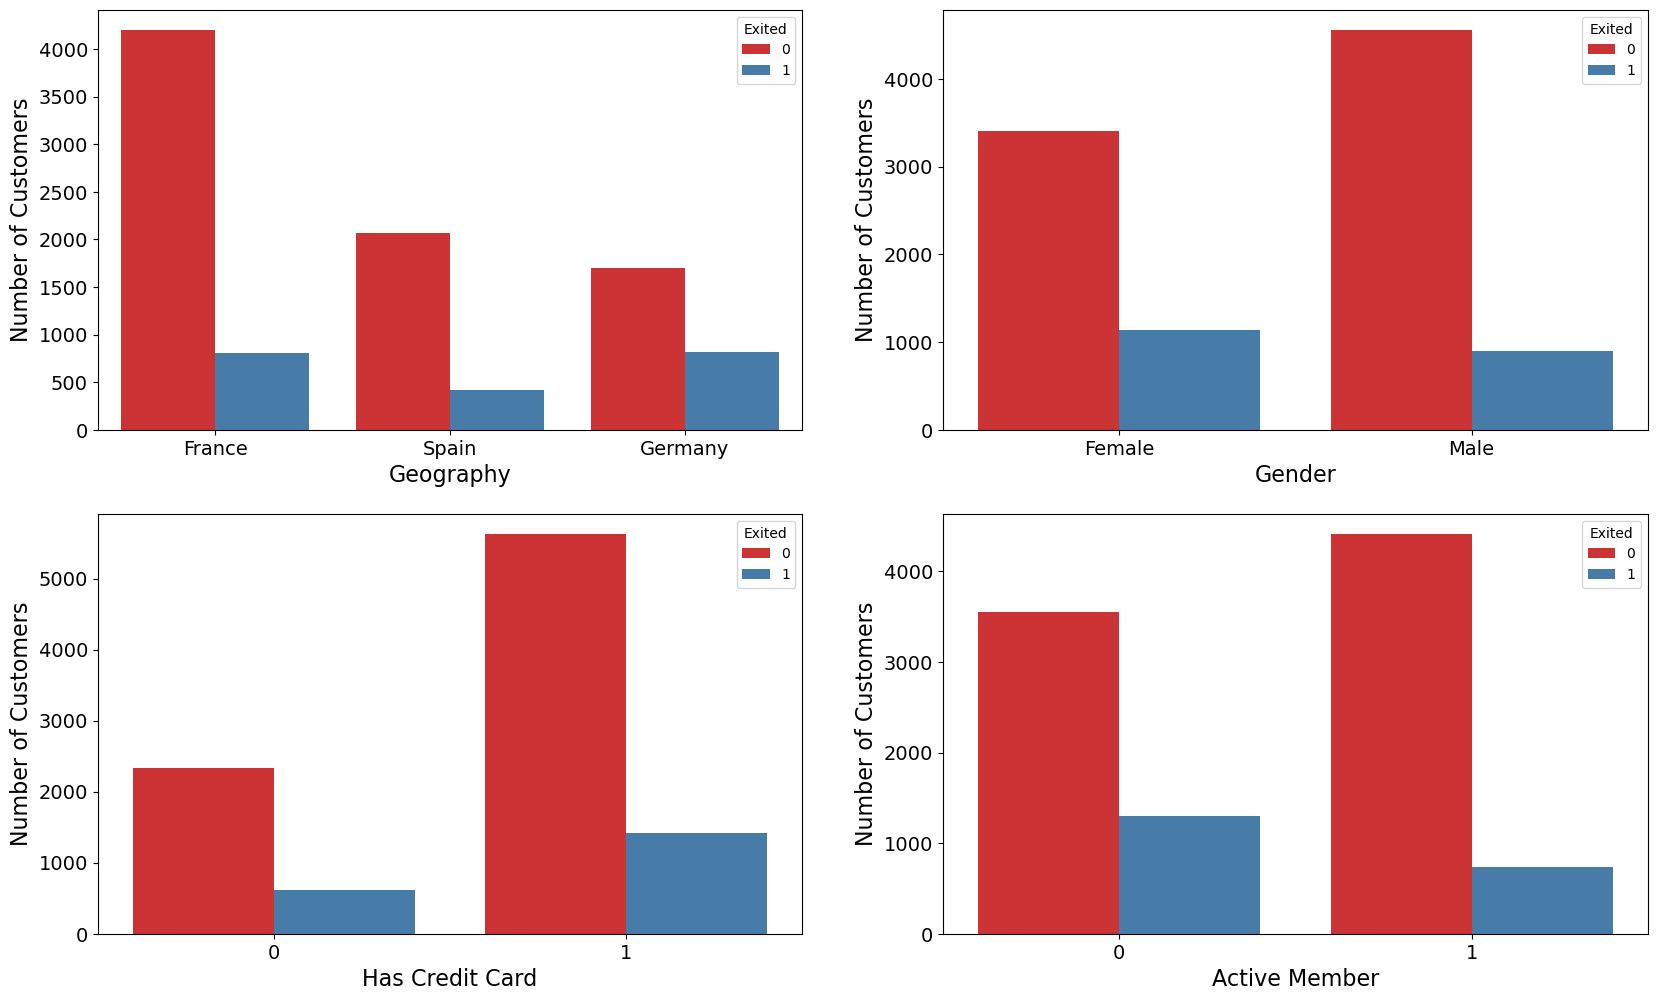

In [33]:
fig,axarr= plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'

sns.countplot(x='Geography', hue='Exited', data=df, palette=palette, ax=axarr[0][0])
axarr[0][0].set_xlabel('Geography', fontsize=16)
axarr[0][0].set_ylabel('Number of Customers', fontsize=16)
axarr[0][0].tick_params(labelsize=14)

sns.countplot(x='Gender', hue='Exited', data=df, palette=palette, ax=axarr[0][1])
axarr[0][1].set_xlabel('Gender', fontsize=16)
axarr[0][1].set_ylabel('Number of Customers', fontsize=16)
axarr[0][1].tick_params(labelsize=14)

sns.countplot(x='HasCrCard', hue='Exited', data=df, palette=palette, ax=axarr[1][0])
axarr[1][0].set_xlabel('Has Credit Card', fontsize=16)
axarr[1][0].set_ylabel('Number of Customers', fontsize=16)
axarr[1][0].tick_params(labelsize=14)

sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=palette, ax=axarr[1][1])
axarr[1][1].set_xlabel('Active Member', fontsize=16)
axarr[1][1].set_ylabel('Number of Customers', fontsize=16)
axarr[1][1].tick_params(labelsize=14)


# Correlation 

In [34]:
corr=df.corrwith(df['Exited'])
corr

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
dtype: float64

(<Figure size 1200x600 with 2 Axes>, <AxesSubplot:>)

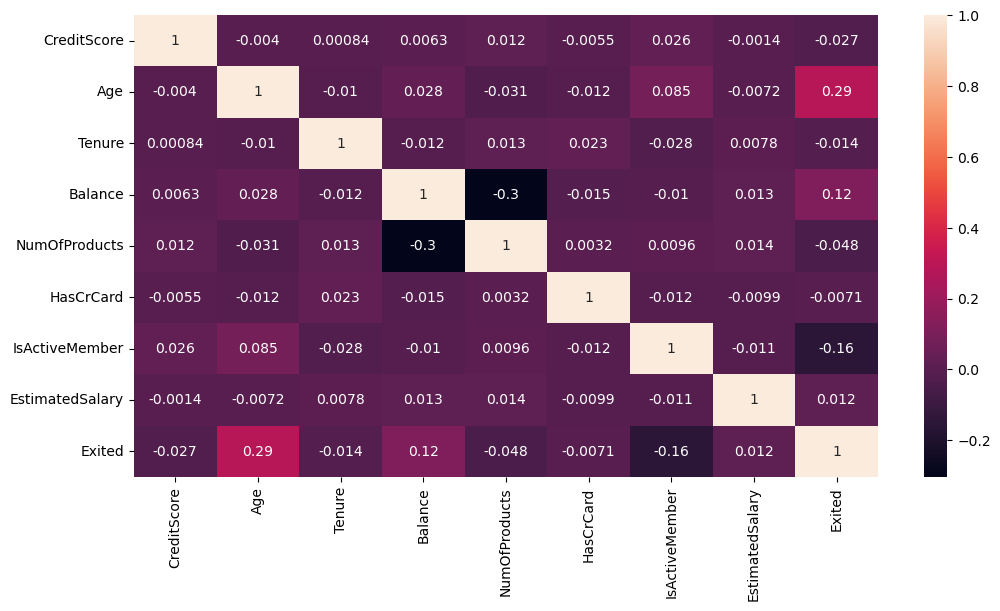

In [35]:
fig=plt.figure(figsize=(12,6))
fig,sns.heatmap(df.corr(),annot=True)

# Most of the feature are not significant to target variable

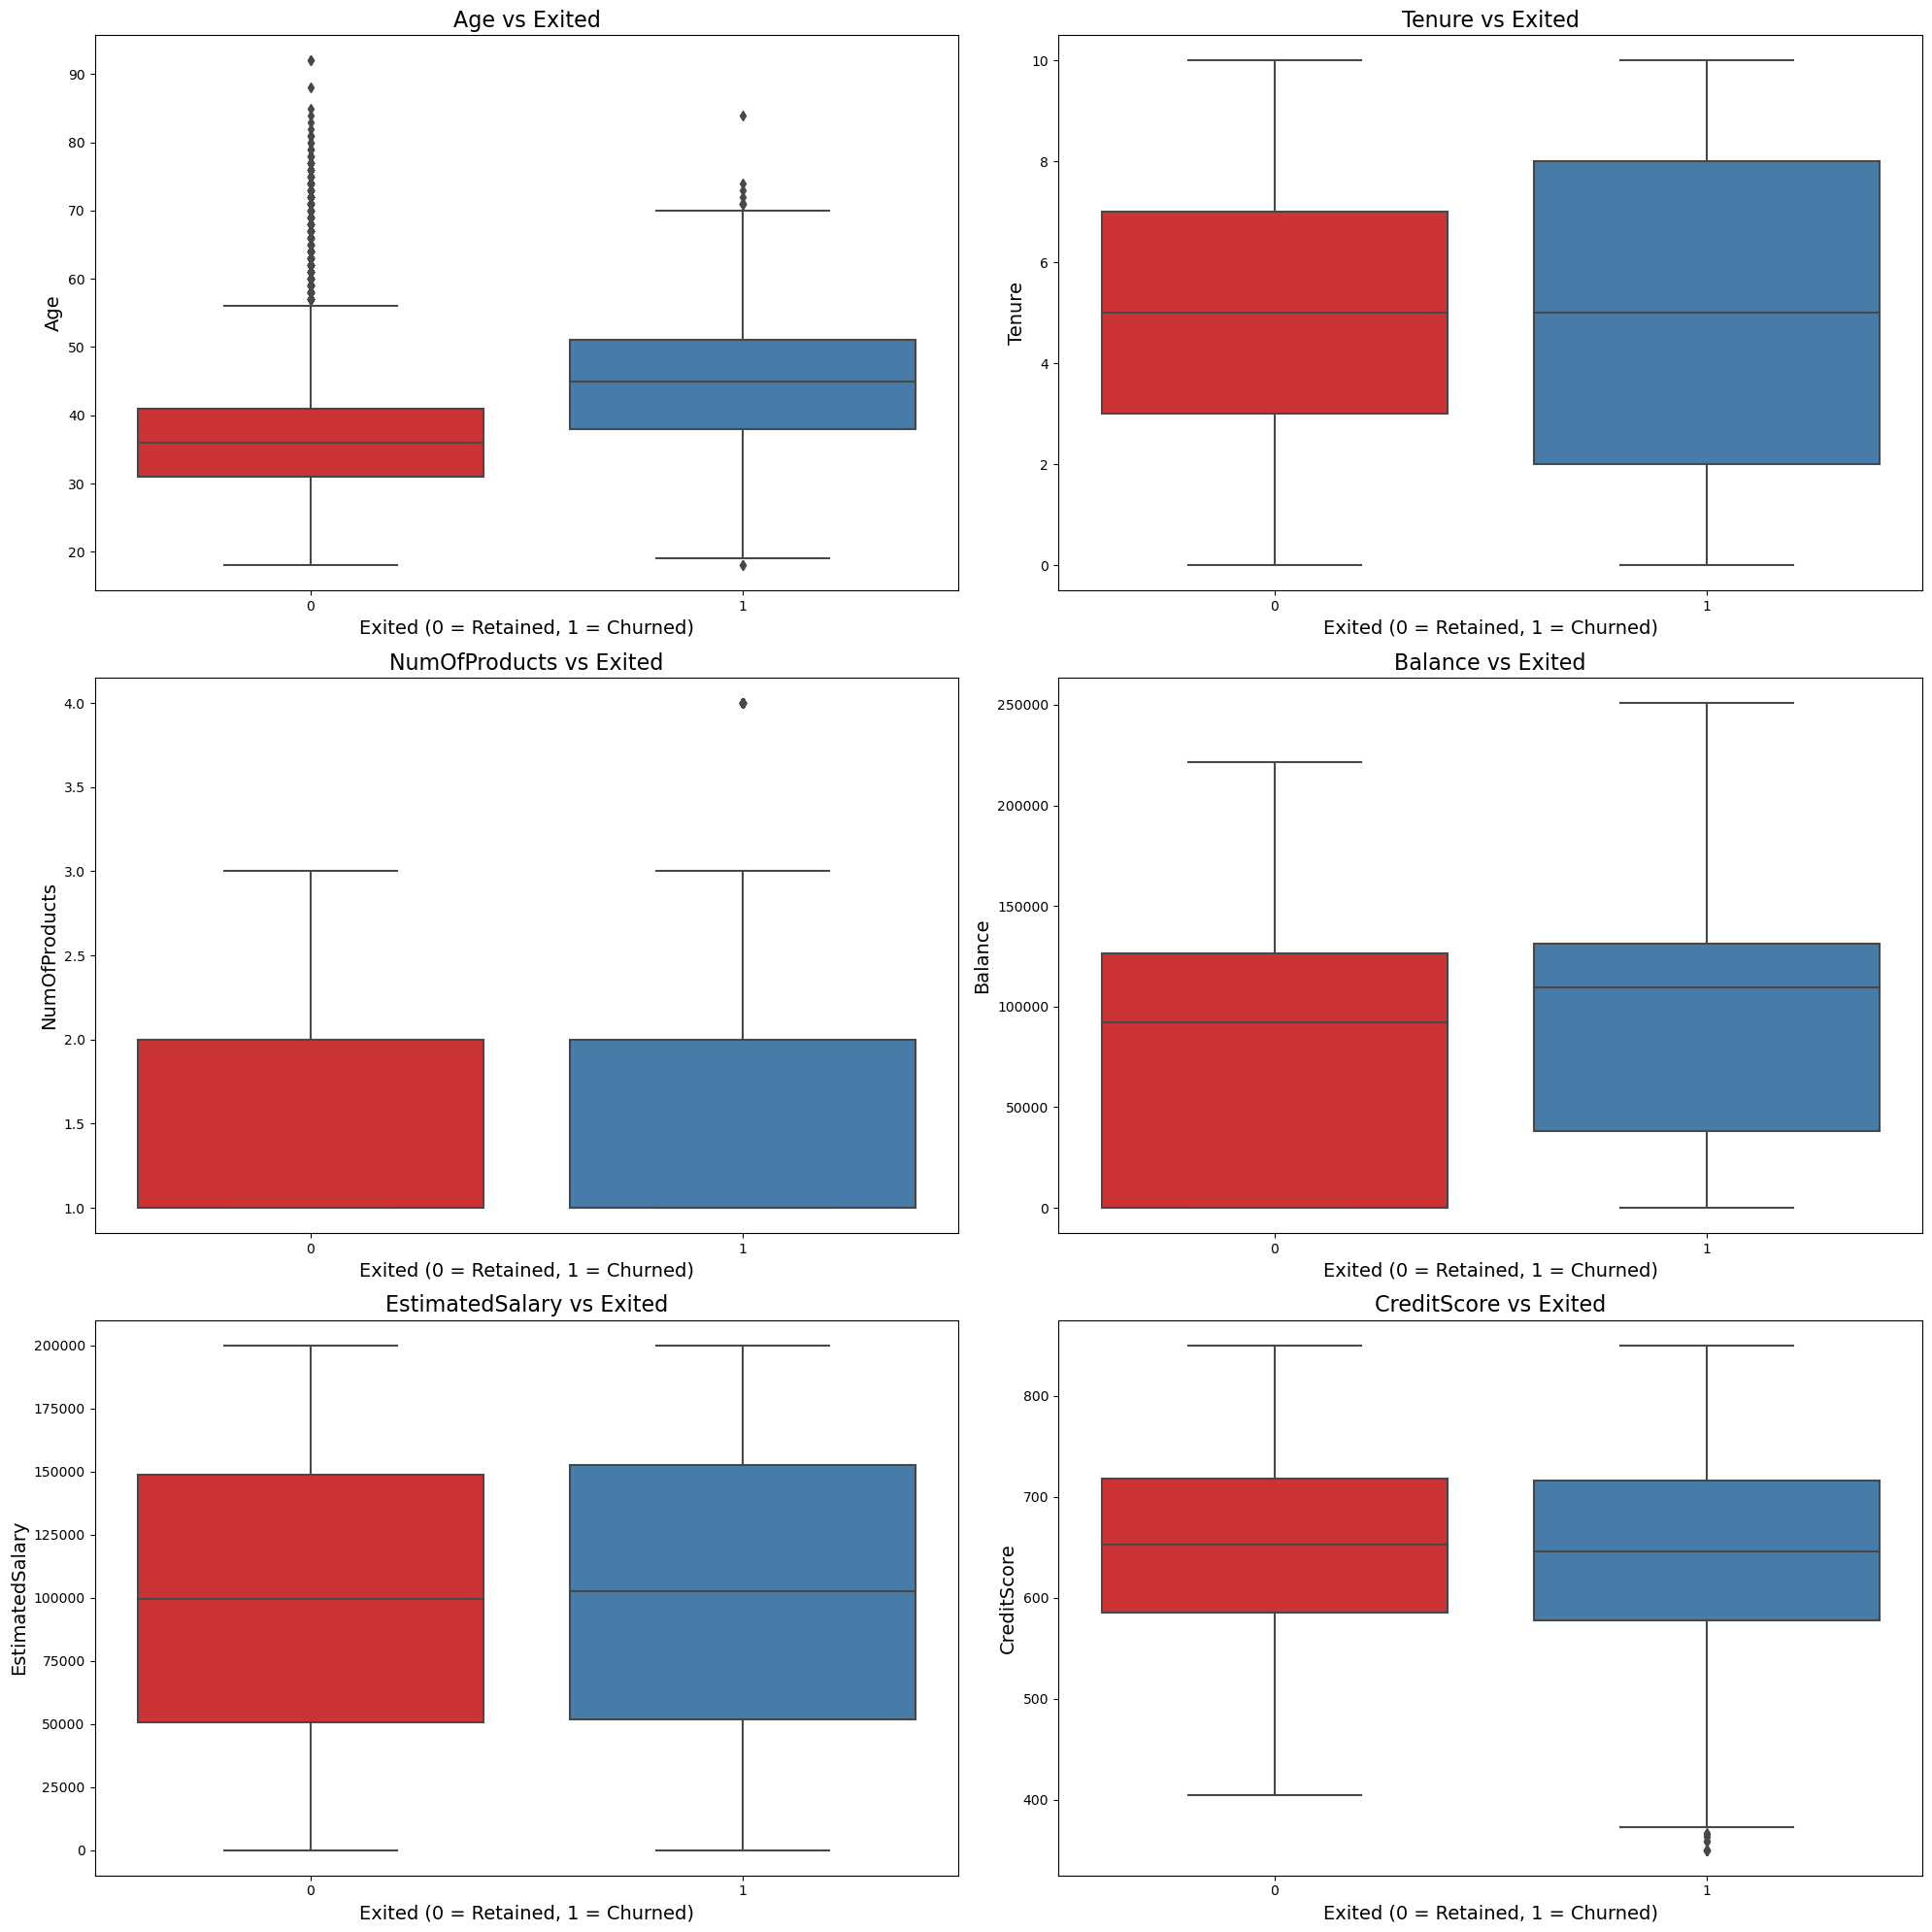

In [36]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(y=df['Age'], x=df['Exited'], ax=axarr[0][0], palette='Set1')
axarr[0][0].set_title('Age vs Exited', size=16)
axarr[0][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][0].set_ylabel('Age', size=14)

sns.boxplot(y=df['Tenure'], x=df['Exited'], ax=axarr[0][1], palette='Set1')
axarr[0][1].set_title('Tenure vs Exited', size=16)
axarr[0][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][1].set_ylabel('Tenure', size=14)

sns.boxplot(y=df['NumOfProducts'], x=df['Exited'], ax=axarr[1][0], palette='Set1')
axarr[1][0].set_title('NumOfProducts vs Exited', size=16)
axarr[1][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][0].set_ylabel('NumOfProducts', size=14)

sns.boxplot(y=df['Balance'], x=df['Exited'], ax=axarr[1][1], palette='Set1')
axarr[1][1].set_title('Balance vs Exited', size=16)
axarr[1][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][1].set_ylabel('Balance', size=14)

sns.boxplot(y=df['EstimatedSalary'], x=df['Exited'], ax=axarr[2][0], palette='Set1')
axarr[2][0].set_title('EstimatedSalary vs Exited', size=16)
axarr[2][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][0].set_ylabel('EstimatedSalary', size=14)

sns.boxplot(y=df['CreditScore'], x=df['Exited'], ax=axarr[2][1], palette='Set1')
axarr[2][1].set_title('CreditScore vs Exited', size=16)
axarr[2][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][1].set_ylabel('CreditScore', size=14)

plt.tight_layout()
plt.show()

In [37]:
cont_features=df.select_dtypes('float64').columns
cont_features

Index(['Balance', 'EstimatedSalary'], dtype='object')

In [38]:
disc_features=df.select_dtypes('int64').columns
disc_features

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [39]:
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['Geography', 'Gender'], dtype='object')

Text(1021.4999999999999, 0.5, 'Age')

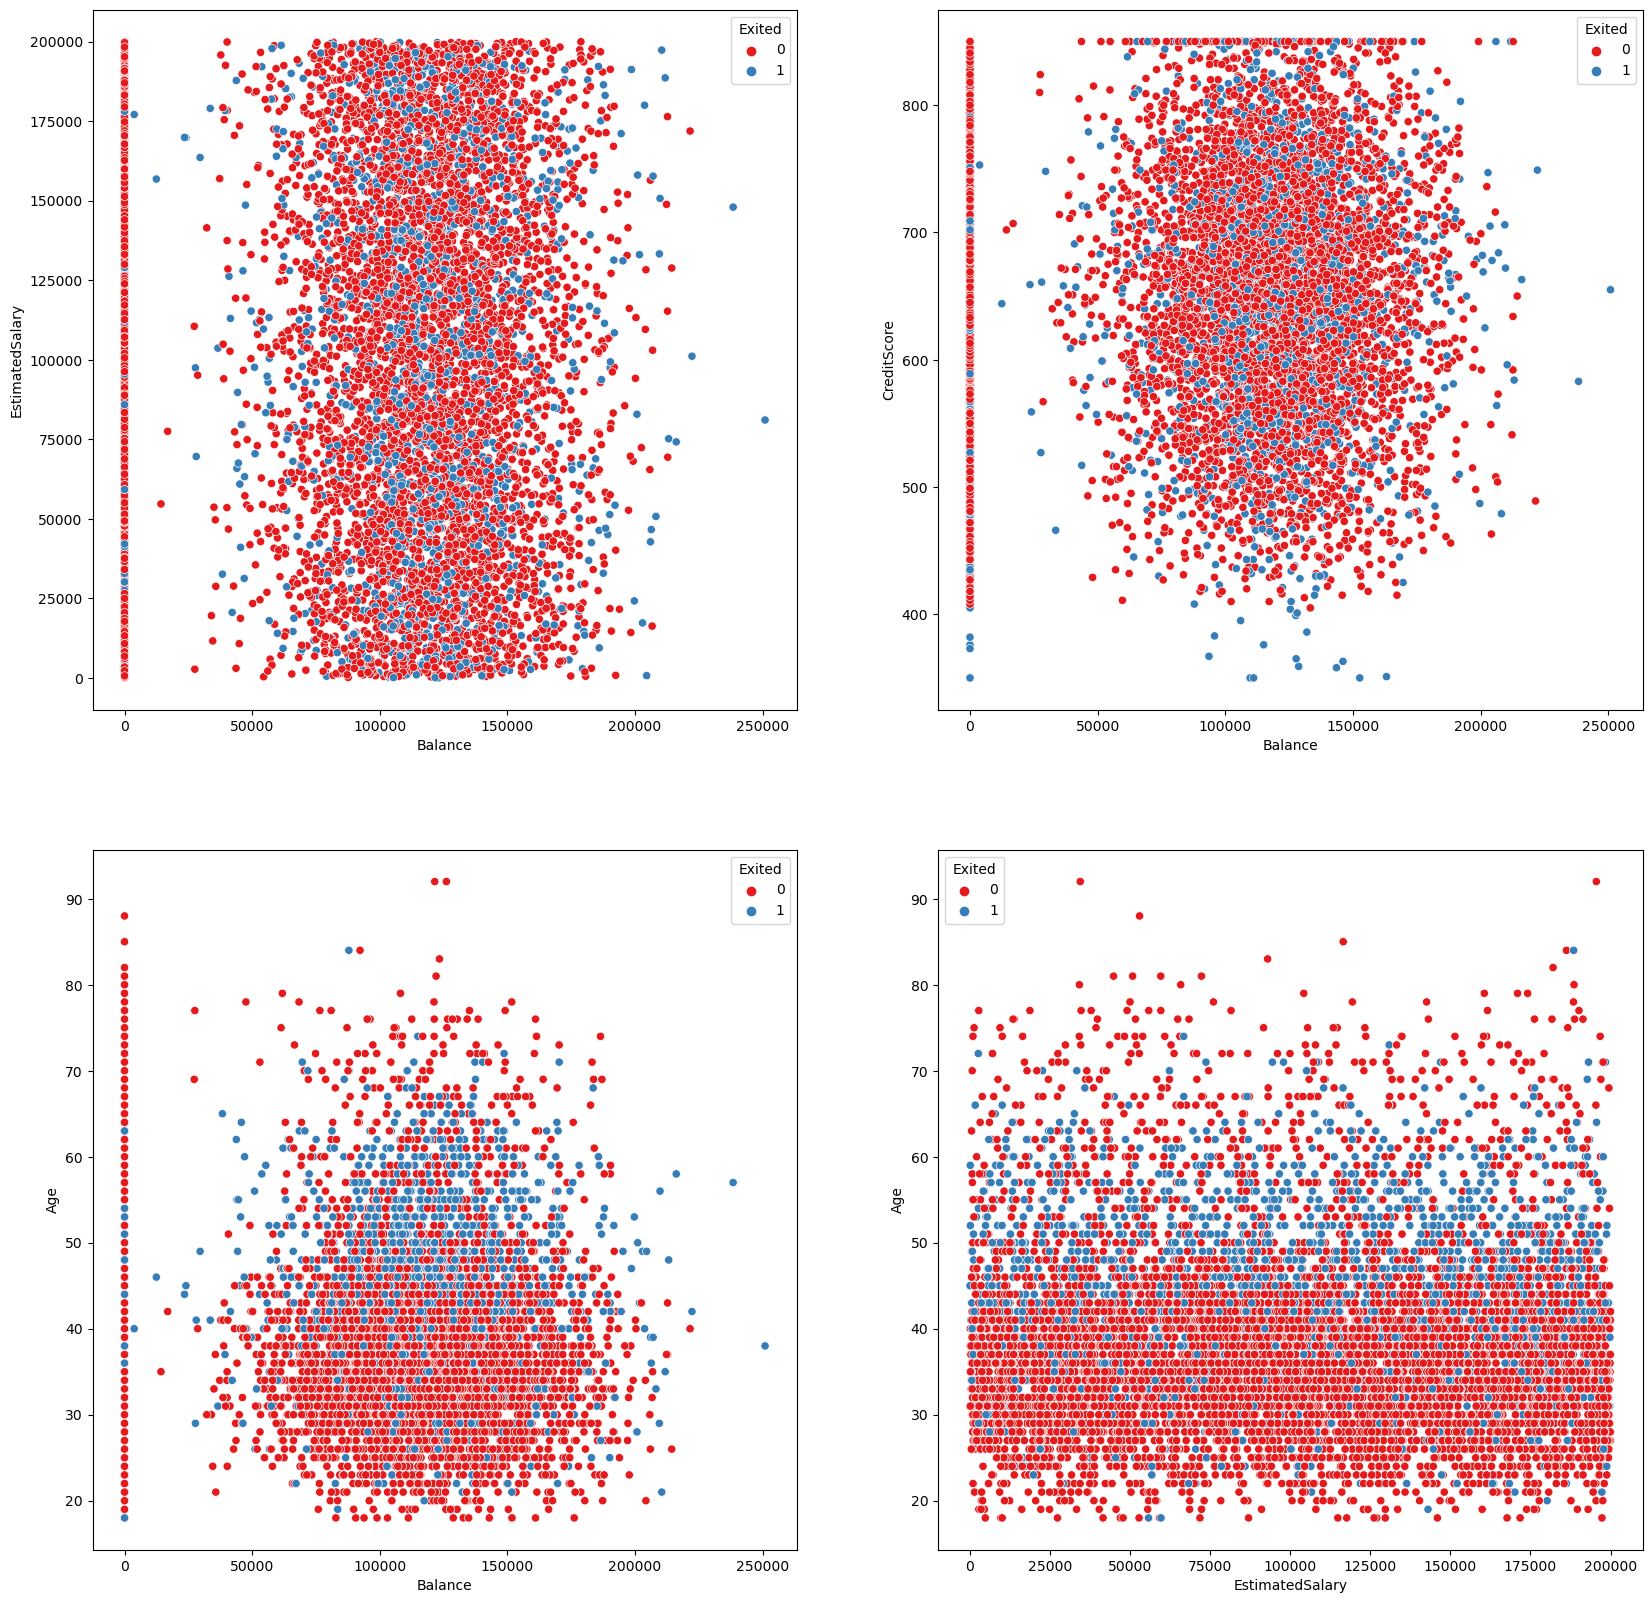

In [40]:
fig,ax=plt.subplots(2,2,figsize=(20,20))

ax[0][0]=sns.scatterplot(x=df['Balance'],y=df['EstimatedSalary'],ax=ax[0][0],hue=df['Exited'],palette='Set1')
axarr[0][0].set_title('Balance vs EstimatedSalary', size=16)
axarr[0][0].set_xlabel('Balance size',size=14)
axarr[0][0].set_ylabel('EstimatedSalary', size=14)

ax[0][1]=sns.scatterplot(x=df['Balance'],y=df['CreditScore'],ax=ax[0][1],hue=df['Exited'],palette='Set1')
axarr[0][1].set_title('Balance vs CreditScore', size=16)
axarr[0][1].set_xlabel('Balance size',size=14)
axarr[0][1].set_ylabel('CreditScore', size=14)

ax[1][0]=sns.scatterplot(x=df['Balance'],y=df['Age'],ax=ax[1][0],hue=df['Exited'],palette='Set1')
axarr[1][0].set_title('Balance vs Age', size=16)
axarr[1][0].set_xlabel('Balance size',size=14)
axarr[1][0].set_ylabel('Age', size=14)

ax[1][1]=sns.scatterplot(x=df['EstimatedSalary'],y=df['Age'],ax=ax[1][1],hue=df['Exited'],palette='Set1')
axarr[1][1].set_title('Balance vs EstimatedSalary', size=16)
axarr[1][1].set_xlabel('Balance',size=14)
axarr[1][1].set_ylabel('Age', size=14)

In [41]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Converting the categorical column to numerical

In [42]:
lb=LabelEncoder()
for i in cat_columns:
    df[i]=lb.fit_transform(df[i])

# test train split

In [43]:
x=df.drop(columns=['Exited'])
y=df.Exited

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# feature scaling

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

# Model building

- since given dataset is imbalanced First we need to create a base model 

In [46]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [47]:
logit=LogisticRegression().fit(X_train,y_train)
y_pred=logit.predict(X_test)
print("training accuracy:{}".format(logit.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8045714285714286
test accuracy:0.8166666666666667
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2832
           1       0.17      0.60      0.27       168

    accuracy                           0.82      3000
   macro avg       0.57      0.72      0.58      3000
weighted avg       0.93      0.82      0.86      3000



<AxesSubplot:>

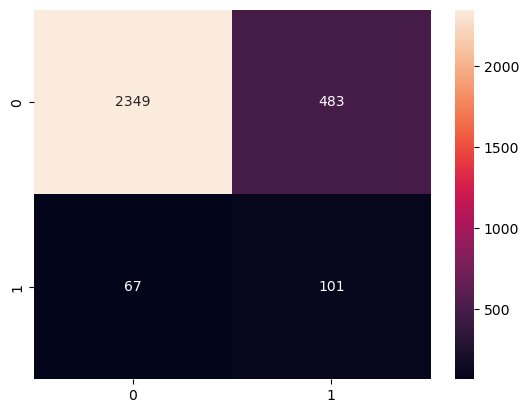

In [48]:
con_mtx=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(con_mtx,annot=True,fmt='d')

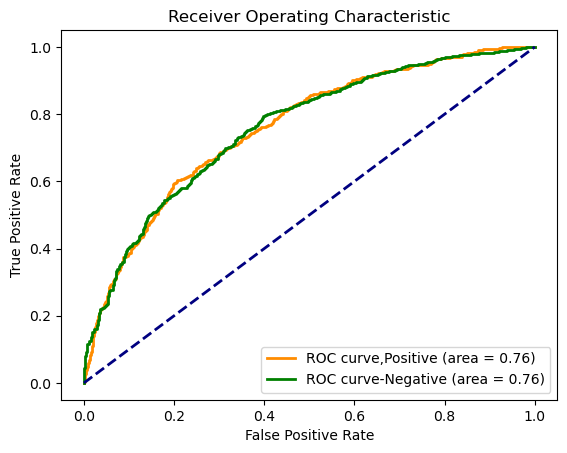

In [49]:
y_prob=logit.predict_proba(X_test)

fpr_pos,tpr_pos,threshold_pos=metrics.roc_curve(y_test,y_prob[:,1],pos_label=1)
fpr_neg,tpr_neg,threshold_neg=metrics.roc_curve(y_test,y_prob[:,0],pos_label=0)

auc_pos=metrics.auc(fpr_pos,tpr_pos)
auc_neg=metrics.auc(fpr_neg,tpr_neg)

plt.plot(fpr_pos, tpr_pos, color='darkorange', lw=2, label='ROC curve,Positive (area = %0.2f)' % auc_pos)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve-Negative (area = %0.2f)' % auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Svm model

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [51]:
# svm_model=SVC()

# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#               'gamma': ['scale', 'auto', 0.1, 1, 10]}
# grid_svm=GridSearchCV(svm_model,param_grid=param_grid,cv=5,verbose=10)
# grid_svm.fit(X_train,y_train)

In [52]:
# C=0.1, gamma=1, kernel=poly;
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("training accuracy:{}".format(svm_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8581428571428571
test accuracy:0.8693333333333333
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2746
           1       0.38      0.88      0.53       254

    accuracy                           0.87      3000
   macro avg       0.68      0.87      0.73      3000
weighted avg       0.94      0.87      0.89      3000



<AxesSubplot:>

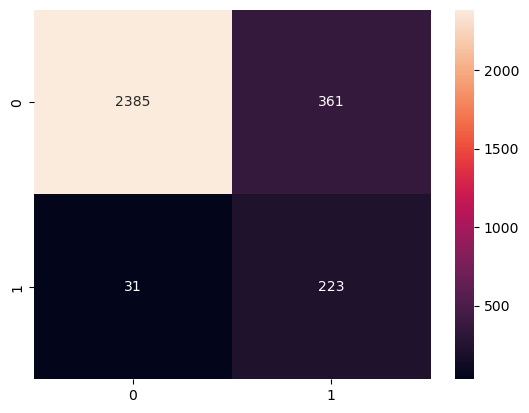

In [53]:
con_mtx=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(con_mtx,annot=True,fmt='d')

# KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_model=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("training accuracy:{}".format(knn_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8495714285714285
test accuracy:0.845
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2783
           1       0.29      0.77      0.42       217

    accuracy                           0.84      3000
   macro avg       0.63      0.81      0.67      3000
weighted avg       0.93      0.84      0.88      3000



# Recall is well improved from 0.6 to 0.88 whereas the precision is improved to 0.20 to 0.38

# Upsampling the given dataset using smote method

In [56]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

X_resampled,y_resampled=smote.fit_resample(x,y)

In [57]:
y_resampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [58]:
Xs_train,Xs_test,Ys_train,Ys_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [59]:
Xs1_train=scaler.fit_transform(Xs_train)
Xs1_test=scaler.fit_transform(Xs_test)

# Model building after upsampling

In [60]:
# Logit regression

In [61]:
logit=LogisticRegression().fit(Xs1_train,Ys_train)
y_pred=logit.predict(Xs1_test)
print("training accuracy:{}".format(logit.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.774578399712953
test accuracy:0.7653830054416074
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2359
           1       0.78      0.75      0.77      2419

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



# Now Recall and Precision  is well improved.

# Svm model

In [62]:
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(Xs1_train,Ys_train)
y_pred=svm_model.predict(Xs1_test)
print("training accuracy:{}".format(svm_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.837908144958737
test accuracy:0.8281707827542905
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2341
           1       0.84      0.81      0.83      2437

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778



# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn_model=KNeighborsClassifier(n_neighbors=10).fit(Xs1_train,Ys_train)
y_pred=knn_model.predict(Xs1_test)
print("training accuracy:{}".format(knn_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8461607463222103
test accuracy:0.817915445793219
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2490
           1       0.80      0.82      0.81      2288

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



# Decision Tree

In [65]:
# dt_model=DecisionTreeClassifier()
# param_grid={'max_depth':range(1,20),'criterion':['gini','entropy']}
# # dt_grid=GridSearchCV(dt_model,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

In [66]:
# dt_grid.best_params_

In [67]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth= 8).fit(Xs1_train,Ys_train)
y_pred=dt_model.predict(Xs1_test)
print("training accuracy:{}".format(dt_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8466989594546107
test accuracy:0.8124738384261198
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2350
           1       0.83      0.80      0.81      2428

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778



# Random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# rf_model=RandomForestClassifier()
# param_grid={'n_estimators':[100,200,500],'max_depth':range(1,20),'criterion':['gini','entropy']}
# rf_grid=GridSearchCV(rf_model,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

In [70]:
# rf_grid.best_params_

In [71]:
rf_model=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth= 19).fit(Xs1_train,Ys_train)
y_pred=rf_model.predict(Xs1_test)
print("training accuracy:{}".format(rf_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.9991029781126659
test accuracy:0.8551695269987443
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2386
           1       0.86      0.85      0.85      2392

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



# Adaboost

In [72]:
# ad_clf=AdaBoostClassifier(base_estimator=dt_model)
# param_grid={'n_estimators':[100,200,500],'learning_rate':[0.01,0.1,1]}
# ad_grid=GridSearchCV(ad_clf,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

In [73]:
# ad_grid.best_params_

In [74]:
ad_clf=AdaBoostClassifier(base_estimator=dt_model,learning_rate=0.1,n_estimators=500).fit(Xs1_train,Ys_train)
y_pred=ad_clf.predict(Xs1_test)
print("training accuracy:{}".format(ad_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:1.0
test accuracy:0.8752616157388029
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2392
           1       0.88      0.87      0.87      2386

    accuracy                           0.88      4778
   macro avg       0.88      0.88      0.88      4778
weighted avg       0.88      0.88      0.88      4778



# Gradient boosting

In [75]:
# gb_clf=GradientBoostingClassifier()
# param_grid={'n_estimators':[100,200,500],'learning_rate':[0.01,0.1,1]}
# ad_grid=GridSearchCV(gb_clf,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

In [76]:
# ad_grid.best_params_

In [77]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500).fit(Xs1_train,Ys_train)
y_pred=gb_clf.predict(Xs1_test)
print("training accuracy:{}".format(gb_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8878722640832436
test accuracy:0.8419840937630808
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2425
           1       0.84      0.84      0.84      2353

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



# Xgboost

In [78]:
import xgboost as xgr

In [79]:
xgr_clf=xgr.XGBClassifier().fit(Xs1_train,Ys_train)
y_pred=xgr_clf.predict(Xs1_test)
print("training accuracy:{}".format(xgr_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.9489594546106925
test accuracy:0.8595646714106321
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2383
           1       0.87      0.85      0.86      2395

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



- out of all the models we can see logistic regression,svm,knn gives preetty good compare to others wheras other models as per result we can see that there is high variance and low bias so further lets do feature selection this might help us to normalize the overfitting and improve accuracy

In [80]:
from sklearn.feature_selection import SelectKBest,RFE,chi2,f_classif,mutual_info_classif

In [81]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(x, y)

SelectKBest(k=8)

In [82]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

<Figure size 1200x2000 with 0 Axes>

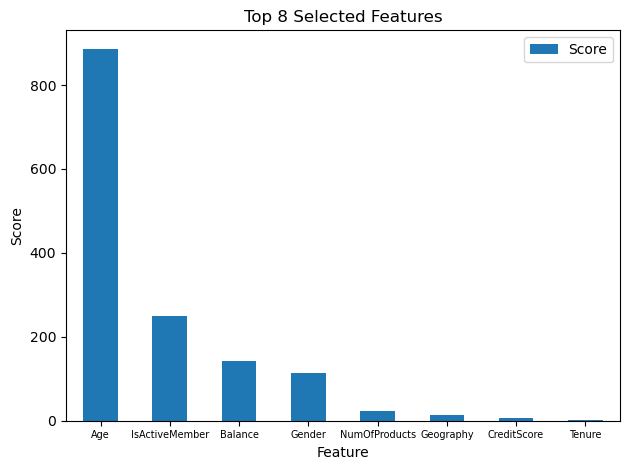

In [83]:
# Create a DataFrame with the selected features and their scores
feature_scores = pd.DataFrame({"Feature": x.columns, "Score": selector.scores_})
feature_scores = feature_scores.nlargest(8, "Score") # Select top k features based on scores

# Create a barplot of the selected features and their scores
fig=plt.figure(figsize=(12,20))
ax = feature_scores.plot.bar(x="Feature", y="Score", rot=0)
ax.set_ylabel("Score")
ax.set_title("Top {} Selected Features".format(8))
ax.tick_params(axis='x', labelsize=7)
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

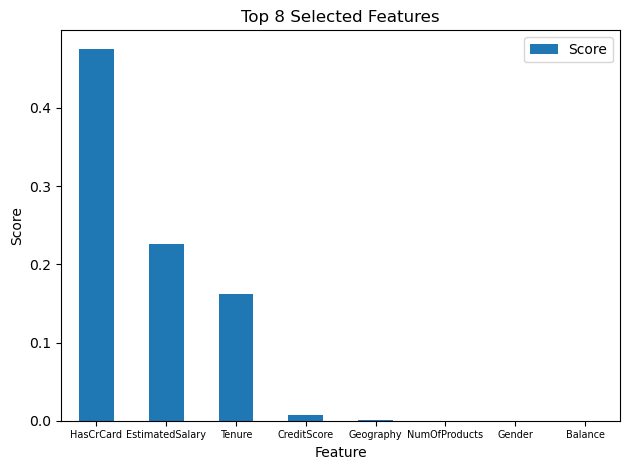

In [84]:
# Create a DataFrame with the selected features and their scores
feature_scores = pd.DataFrame({"Feature": x.columns, "Score": selector.pvalues_})
feature_scores = feature_scores.nlargest(8, "Score") # Select top k features based on scores

# Create a barplot of the selected features and their scores
fig=plt.figure(figsize=(12,20))
ax = feature_scores.plot.bar(x="Feature", y="Score", rot=0)
ax.set_ylabel("Score")
ax.set_title("Top {} Selected Features".format(8))
ax.tick_params(axis='x', labelsize=7)
plt.tight_layout()
plt.show()

In [85]:
selected_features=list(feature_scores['Feature'])
selected_features

['HasCrCard',
 'EstimatedSalary',
 'Tenure',
 'CreditScore',
 'Geography',
 'NumOfProducts',
 'Gender',
 'Balance']

In [86]:
x=df[selected_features]
y=df['Exited']

In [87]:
from imblearn.combine import SMOTEENN

In [88]:
smote=SMOTEENN(random_state=42)
x_sampled,y_sampled=smote.fit_resample(x,y)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=42)

In [90]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [91]:
logit=LogisticRegression().fit(X_train,y_train)
y_pred=logit.predict(X_test)
print("training accuracy:{}".format(logit.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.7291847354726799
test accuracy:0.7293879615579161
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       779
           1       0.80      0.74      0.77      1198

    accuracy                           0.73      1977
   macro avg       0.72      0.73      0.72      1977
weighted avg       0.74      0.73      0.73      1977



In [92]:
# C=0.1, gamma=1, kernel=poly;
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("training accuracy:{}".format(svm_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.7868603642671292
test accuracy:0.7824987354577643
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       776
           1       0.85      0.78      0.81      1201

    accuracy                           0.78      1977
   macro avg       0.77      0.78      0.78      1977
weighted avg       0.79      0.78      0.78      1977



In [93]:
knn_model=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("training accuracy:{}".format(knn_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8107111882046835
test accuracy:0.7683358624178047
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       874
           1       0.79      0.79      0.79      1103

    accuracy                           0.77      1977
   macro avg       0.77      0.77      0.77      1977
weighted avg       0.77      0.77      0.77      1977



In [94]:
dt_model.feature_importances_

array([0.02984667, 0.04722372, 0.09998342, 0.31980418, 0.0127373 ,
       0.07410528, 0.1699288 , 0.00783178, 0.20441091, 0.03412796])

In [95]:
knn=RandomForestClassifier()

In [96]:
rfe = RFE(estimator=knn, n_features_to_select=5)
rfe.fit(x, y)

# Print the selected features
print("Selected Features: ", rfe.support_)

Selected Features:  [False  True  True  True False  True False  True]


In [97]:
x.columns[rfe.support_]

Index(['EstimatedSalary', 'Tenure', 'CreditScore', 'NumOfProducts', 'Balance'], dtype='object')

In [98]:
# ANN model

In [99]:
x=df.drop(columns=['Exited'])
y=df.Exited        

In [100]:
x_sampled,y_sampled=smote.fit_resample(x,y)

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=42)

In [102]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [103]:
# two types of can be built using keras:Sequential and Non-Sequential

# Sequential model

In [104]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from keras.optimizers import Adam

In [105]:
model=Sequential()
model.add(Dense(4,input_dim=x.shape[1],activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [106]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=1000,batch_size=30,verbose=10)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

Epoch 555/1000
Epoch 556/1000
Epoch 557/1000
Epoch 558/1000
Epoch 559/1000
Epoch 560/1000
Epoch 561/1000
Epoch 562/1000
Epoch 563/1000
Epoch 564/1000
Epoch 565/1000
Epoch 566/1000
Epoch 567/1000
Epoch 568/1000
Epoch 569/1000
Epoch 570/1000
Epoch 571/1000
Epoch 572/1000
Epoch 573/1000
Epoch 574/1000
Epoch 575/1000
Epoch 576/1000
Epoch 577/1000
Epoch 578/1000
Epoch 579/1000
Epoch 580/1000
Epoch 581/1000
Epoch 582/1000
Epoch 583/1000
Epoch 584/1000
Epoch 585/1000
Epoch 586/1000
Epoch 587/1000
Epoch 588/1000
Epoch 589/1000
Epoch 590/1000
Epoch 591/1000
Epoch 592/1000
Epoch 593/1000
Epoch 594/1000
Epoch 595/1000
Epoch 596/1000
Epoch 597/1000
Epoch 598/1000
Epoch 599/1000
Epoch 600/1000
Epoch 601/1000
Epoch 602/1000
Epoch 603/1000
Epoch 604/1000
Epoch 605/1000
Epoch 606/1000
Epoch 607/1000
Epoch 608/1000
Epoch 609/1000
Epoch 610/1000
Epoch 611/1000
Epoch 612/1000
Epoch 613/1000
Epoch 614/1000
Epoch 615/1000
Epoch 616/1000
Epoch 617/1000
Epoch 618/1000
Epoch 619/1000
Epoch 620/1000
Epoch 621/

In [107]:
y_pred_train = np.round(model.predict(X_train)).astype(int)
y_pred_test = np.round(model.predict(X_test)).astype(int)
print("Training_accuracy:{}",accuracy_score(y_pred_train,y_train))
print("Testing_accuracy:{}",accuracy_score(y_pred_test,y_test))
print(metrics.classification_report(y_pred_test,y_test))

62/62 [==============================] - 0s 2ms/step
Training_accuracy:{} 0.8371941978783286
Testing_accuracy:{} 0.8222222222222222
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       823
           1       0.87      0.82      0.84      1157

    accuracy                           0.82      1980
   macro avg       0.82      0.82      0.82      1980
weighted avg       0.83      0.82      0.82      1980



Epoch 1/100
145/145 [==============================] - 1s 6ms/step - loss: 0.3530 - accuracy: 0.8344 - val_loss: 0.3809 - val_accuracy: 0.8227
Epoch 2/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3543 - accuracy: 0.8350 - val_loss: 0.3793 - val_accuracy: 0.8237
Epoch 3/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3536 - accuracy: 0.8348 - val_loss: 0.3804 - val_accuracy: 0.8222
Epoch 4/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3542 - accuracy: 0.8350 - val_loss: 0.3834 - val_accuracy: 0.8162
Epoch 5/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3543 - accuracy: 0.8370 - val_loss: 0.3826 - val_accuracy: 0.8167
Epoch 6/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3540 - accuracy: 0.8381 - val_loss: 0.3818 - val_accuracy: 0.8197
Epoch 7/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8350 - val_loss: 0.3796 - val_accuracy: 0.8263

Epoch 58/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3538 - accuracy: 0.8372 - val_loss: 0.3797 - val_accuracy: 0.8242
Epoch 59/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3539 - accuracy: 0.8357 - val_loss: 0.3819 - val_accuracy: 0.8182
Epoch 60/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3542 - accuracy: 0.8348 - val_loss: 0.3790 - val_accuracy: 0.8268
Epoch 61/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3531 - accuracy: 0.8355 - val_loss: 0.3807 - val_accuracy: 0.8182
Epoch 62/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3545 - accuracy: 0.8350 - val_loss: 0.3809 - val_accuracy: 0.8192
Epoch 63/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3534 - accuracy: 0.8350 - val_loss: 0.3825 - val_accuracy: 0.8172
Epoch 64/100
145/145 [==============================] - 1s 4ms/step - loss: 0.3542 - accuracy: 0.8357 - val_loss: 0.3788 - val_accuracy:

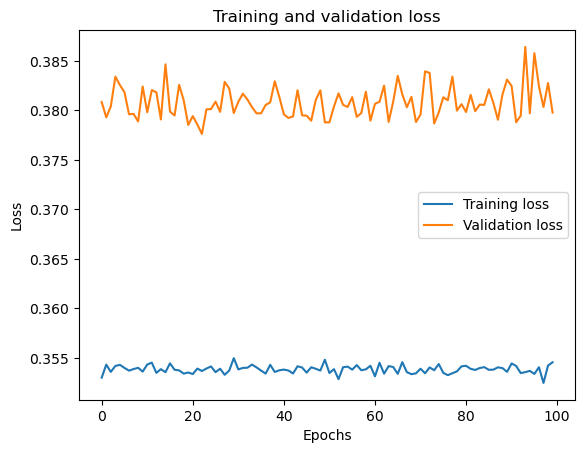

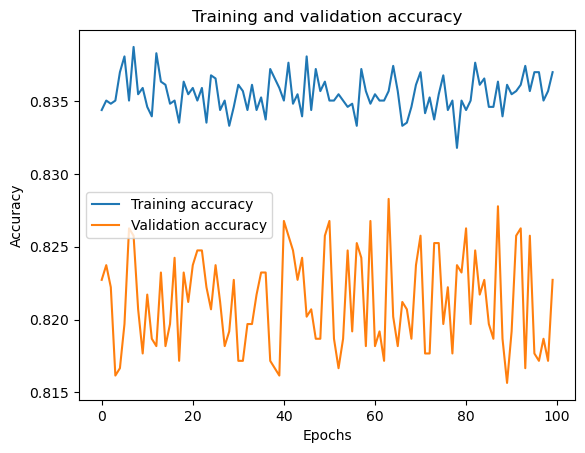

In [108]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [109]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score

# # Define a function to create the ANN model
# def create_model():
#     model = Sequential()
#     model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
#     model.add(Dense(units=8, activation='relu'))
#     model.add(Dense(units=1, activation='sigmoid'))
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Create a KerasClassifier object
# classifier = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# # Obtain the cross-validation scores
# scores = cross_val_score(classifier, X_train, y_train, cv=5)

# # Print the cross-validation scores
# print(scores)


In [110]:
# Finding hayperparameters

In [111]:
# from keras import regularizers

# def create_model(neuron1=12,neuron2=8,learning_rate=0.01,activation='relu',regularization=0):
#     model=Sequential()
#     model.add(Dense(neuron1,input_dim=x.shape[1],activation=activation,kernel_regularizer=regularizers.l2(regularization)))
#     model.add(Dense(neuron2,input_dim=x.shape[1],activation=activation,kernel_regularizer=regularizers.l2(regularization)))
#     model.add(Dense(1,activation='Sigmoild'))
#     optimizer=Adam(learning_rate=learning_rate)
    
#     model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
#     return model

In [112]:
# param_grid={'epochs':[50,100,200],
#             'batch_size':[50,100,150],
#             'neuron1':[1,2,8,12],
#             'neuron2':[1,2,8,12],
#             'learning_rate': [0.001, 0.01, 0.1],
#             'activation': ['relu', 'sigmoid'],
#             'regularization': [0, 0.01, 0.1, 0.001]}
# from keras.wrappers.scikit_learn import KerasClassifier
# model1=KerasClassifier(build_fn=create_model)
# grid_ann=GridSearchCV(estimator=model1,param_grid=param_grid,cv=3,verbose=10,n_jobs=-1)

In [113]:
# grid_ann.best

In [116]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://7b77db74-c39c-4412-a84a-eb50b18ef32d/assets


In [117]:
import pickle
pickle.dump(svm_model,open('svm_model.pkl','wb'))
pickle.dump(knn_model,open('knn_model.pkl','wb'))